### Common DataSet ML vs DL
#### Crop Production CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the CSV data
data = pd.read_csv('crop_production.csv')

In [4]:
print(data.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [5]:
print(data.describe())

           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None


#### Checking for missing values

In [7]:
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [8]:
# Dropping rows missing values in the column
data_without_missing = data.dropna()

In [9]:
# Displaying the shape of the original and modified dataframes to see the difference
print("Original DataFrame Shape:", data.shape)
print("DataFrame Shape after Dropping Missing Values:", data_without_missing.shape)

Original DataFrame Shape: (246091, 7)
DataFrame Shape after Dropping Missing Values: (242361, 7)


In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [14]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [15]:
min_year = data['Crop_Year'].min()
max_year = data['Crop_Year'].max()
print("Range of Years:", min_year, "-", max_year)

Range of Years: 1997 - 2015


In [16]:
categorical_features = ['Season', 'Crop', 'State_Name', 'District_Name']
for feature in categorical_features:
  unique_values = data[feature].unique()
  print(f"Unique values in '{feature}':")
  for value in unique_values:
    print(value)
  print("-" * 20)  # Separator between features

Unique values in 'Season':
Kharif     
Whole Year 
Autumn     
Rabi       
Summer     
Winter     
--------------------
Unique values in 'Crop':
Arecanut
Other Kharif pulses
Rice
Banana
Cashewnut
Coconut 
Dry ginger
Sugarcane
Sweet potato
Tapioca
Black pepper
Dry chillies
other oilseeds
Turmeric
Maize
Moong(Green Gram)
Urad
Arhar/Tur
Groundnut
Sunflower
Bajra
Castor seed
Cotton(lint)
Horse-gram
Jowar
Korra
Ragi
Tobacco
Gram
Wheat
Masoor
Sesamum
Linseed
Safflower
Onion
other misc. pulses
Samai
Small millets
Coriander
Potato
Other  Rabi pulses
Soyabean
Beans & Mutter(Vegetable)
Bhindi
Brinjal
Citrus Fruit
Cucumber
Grapes
Mango
Orange
other fibres
Other Fresh Fruits
Other Vegetables
Papaya
Pome Fruit
Tomato
Mesta
Cowpea(Lobia)
Lemon
Pome Granet
Sapota
Cabbage
Rapeseed &Mustard
Peas  (vegetable)
Niger seed
Bottle Gourd
Varagu
Garlic
Ginger
Oilseeds total
Pulses total
Jute
Peas & beans (Pulses)
Blackgram
Paddy
Pineapple
Barley
Sannhamp
Khesari
Guar seed
Moth
Other Cereals & Millets
Cond-spc

In [17]:
for year in range(min_year, max_year + 1):
  data_by_year = data.loc[data['Crop_Year'] == year]

  print(f"\nData for Year {year}:")  # Corrected indentation
  print(data_by_year.describe())  # Summary statistics for numerical features
  print(data_by_year['Crop'].value_counts())  # Frequency of crop categories


Data for Year 1997:
       Crop_Year          Area    Production
count     8899.0  8.899000e+03  8.899000e+03
mean      1997.0  2.603832e+04  9.565489e+04
std          0.0  1.819098e+05  9.006051e+05
min       1997.0  1.000000e+00  1.000000e+00
25%       1997.0  2.000000e+02  1.700000e+02
50%       1997.0  1.500000e+03  1.637000e+03
75%       1997.0  9.752000e+03  1.453350e+04
max       1997.0  8.580100e+06  3.715800e+07
Crop
Maize                    648
Rice                     607
Arhar/Tur                408
Groundnut                390
Sesamum                  368
Wheat                    365
Jowar                    354
Urad                     345
Sugarcane                330
Moong(Green Gram)        284
Rapeseed &Mustard        278
Gram                     272
Bajra                    265
Potato                   209
Dry chillies             205
Small millets            200
Barley                   199
Ragi                     192
Onion                    186
Paddy             


Data for Year 2006:
       Crop_Year           Area    Production
count    13976.0   13976.000000  1.397600e+04
mean      2006.0   12205.838055  6.212016e+05
std          0.0   38682.166717  1.705284e+07
min       2006.0       0.200000  1.000000e-01
25%       2006.0      89.645000  9.800000e+01
50%       2006.0     637.000000  7.450000e+02
75%       2006.0    4800.000000  6.900000e+03
max       2006.0  933271.000000  8.590000e+08
Crop
Rice                       920
Maize                      811
Moong(Green Gram)          544
Sesamum                    525
Groundnut                  503
Urad                       495
Wheat                      474
Rapeseed &Mustard          462
Gram                       453
Arhar/Tur                  438
Onion                      431
Potato                     425
Jowar                      405
Sugarcane                  402
Dry chillies               380
Sunflower                  316
Bajra                      312
Masoor                     296
Sw

       Crop_Year           Area     Production
count      561.0     561.000000     561.000000
mean      2015.0    8200.174688   12361.969162
std          0.0   28137.272452   45808.434354
min       2015.0       1.000000       0.100000
25%       2015.0      34.000000      21.800000
50%       2015.0     291.000000     227.300000
75%       2015.0    1468.000000    1807.100000
max       2015.0  278000.000000  465000.000000
Crop
Rice                   79
Urad                   64
Moong(Green Gram)      60
Maize                  60
Groundnut              59
Sesamum                51
Horse-gram             32
Rapeseed &Mustard      32
Ragi                   31
Sugarcane              28
Potato                 27
Wheat                  16
Jute                    6
Other Kharif pulses     4
Small millets           4
Soyabean                4
Barley                  4
Name: count, dtype: int64


In [18]:
# feature Engineering
# A function to calculate yield per unit area

def calculate_yield_per_area(row):
    if row['Area'] != 0:
        return row['Production'] / row['Area']
    else:
        return 0  # Handle division by zero if needed

# The function to create the Yield_Per_Area column
data['Yield_Per_Area'] = data.apply(calculate_yield_per_area, axis=1)

#### EDA

In [19]:
# Numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())


Summary Statistics for Numerical Columns:
           Crop_Year          Area    Production  Yield_Per_Area
count  242361.000000  2.423610e+05  2.423610e+05   242361.000000
mean     2005.625773  1.216741e+04  5.825034e+05       41.649059
std         4.958285  5.085744e+04  1.706581e+07      817.572839
min      1997.000000  1.000000e-01  0.000000e+00        0.000000
25%      2002.000000  8.700000e+01  8.800000e+01        0.513514
50%      2006.000000  6.030000e+02  7.290000e+02        1.000000
75%      2010.000000  4.545000e+03  7.023000e+03        2.355450
max      2015.000000  8.580100e+06  1.250800e+09    88000.000000


In [20]:
# Categorical Columns
print("\nCategorical columns:")
data.describe(include='object')


Categorical columns:


,State_Name,District_Name,Season,Crop
count,242361,242361,242361,242361
unique,33,646,6,124
top,Uttar Pradesh,TUMKUR,Kharif,Rice
freq,33189,931,94283,15082


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242361 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   State_Name      242361 non-null  object 
 1   District_Name   242361 non-null  object 
 2   Crop_Year       242361 non-null  int64  
 3   Season          242361 non-null  object 
 4   Crop            242361 non-null  object 
 5   Area            242361 non-null  float64
 6   Production      242361 non-null  float64
 7   Yield_Per_Area  242361 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 16.6+ MB


### Visualizations
#### Distribution of Numerical Columns:

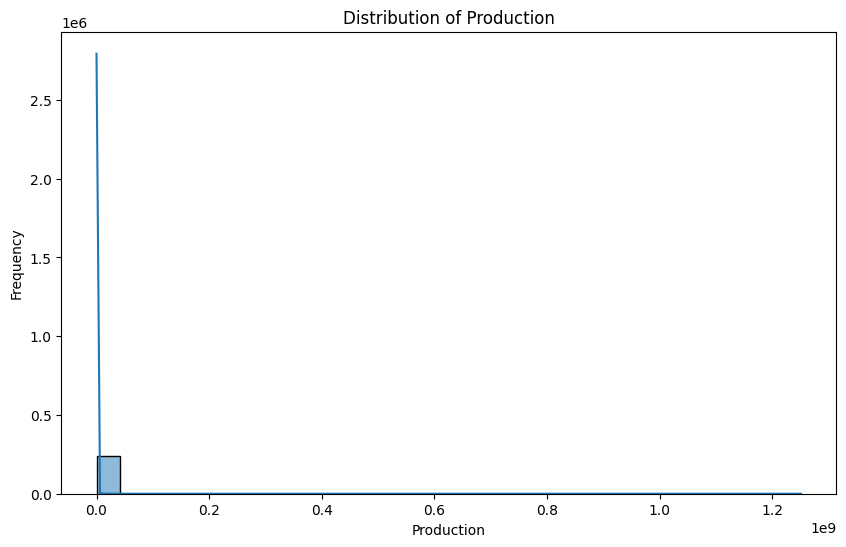

In [22]:
# Distribution of Production 
plt.figure(figsize=(10, 6))
sns.histplot(data['Production'], bins=30, kde=True)
plt.title('Distribution of Production')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

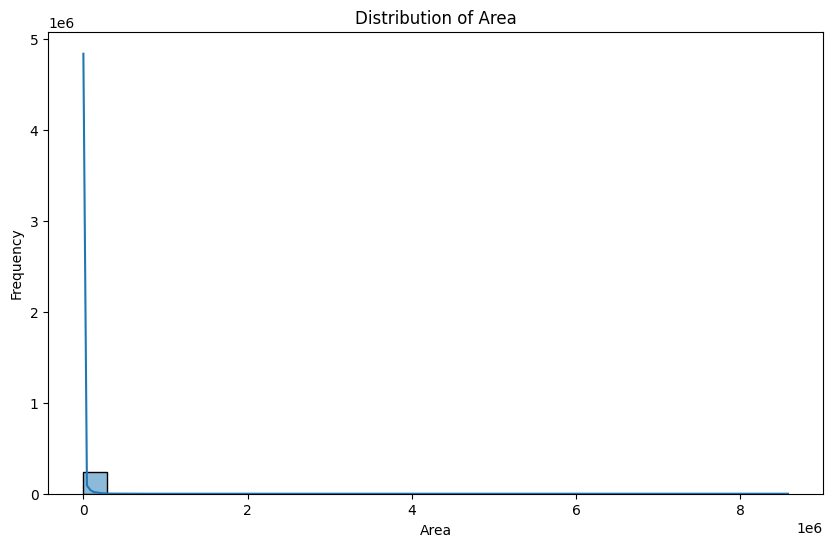

In [23]:
# Distribution of Area
plt.figure(figsize=(10, 6))
sns.histplot(data['Area'], bins=30, kde=True)
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

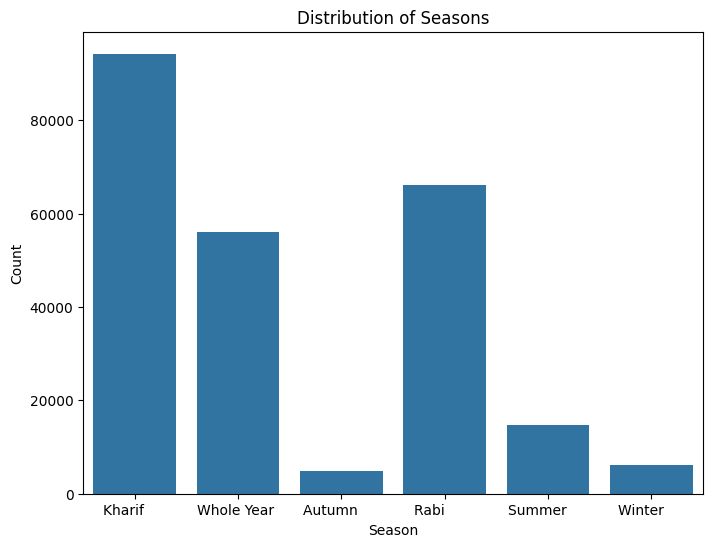

In [24]:
# Distribution of Season
plt.figure(figsize=(8, 6))
sns.countplot(x='Season', data=data)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Distribution of Seasons')
plt.show()

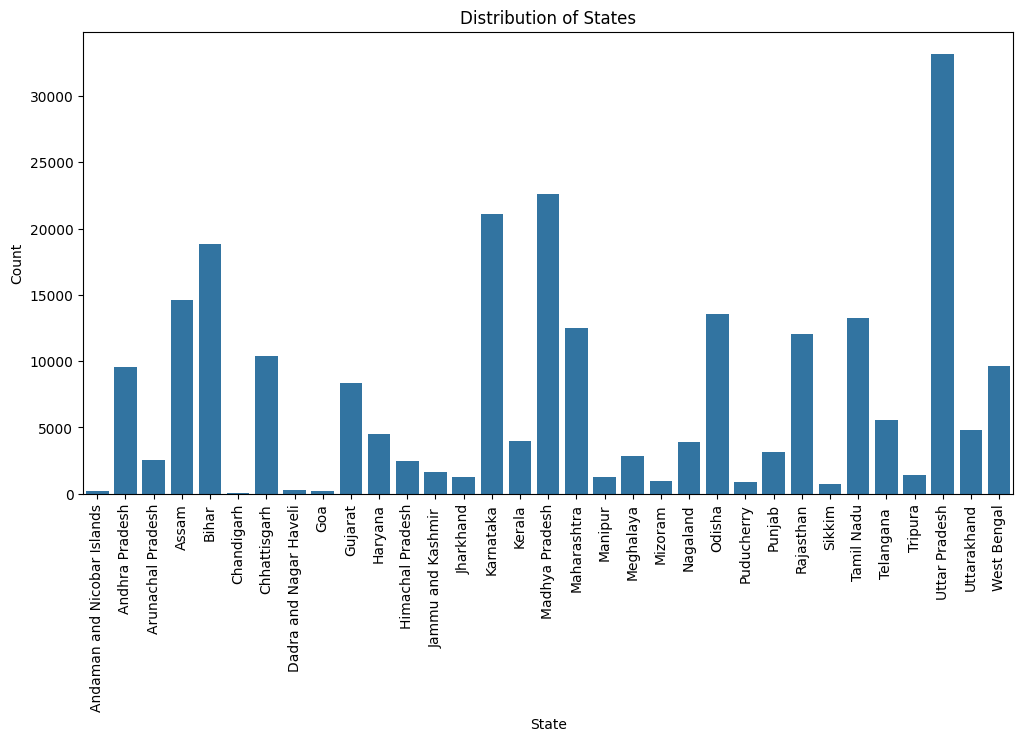

In [24]:
# Distribution of State_Name
plt.figure(figsize=(12, 6))
sns.countplot(x='State_Name', data=data)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of States')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

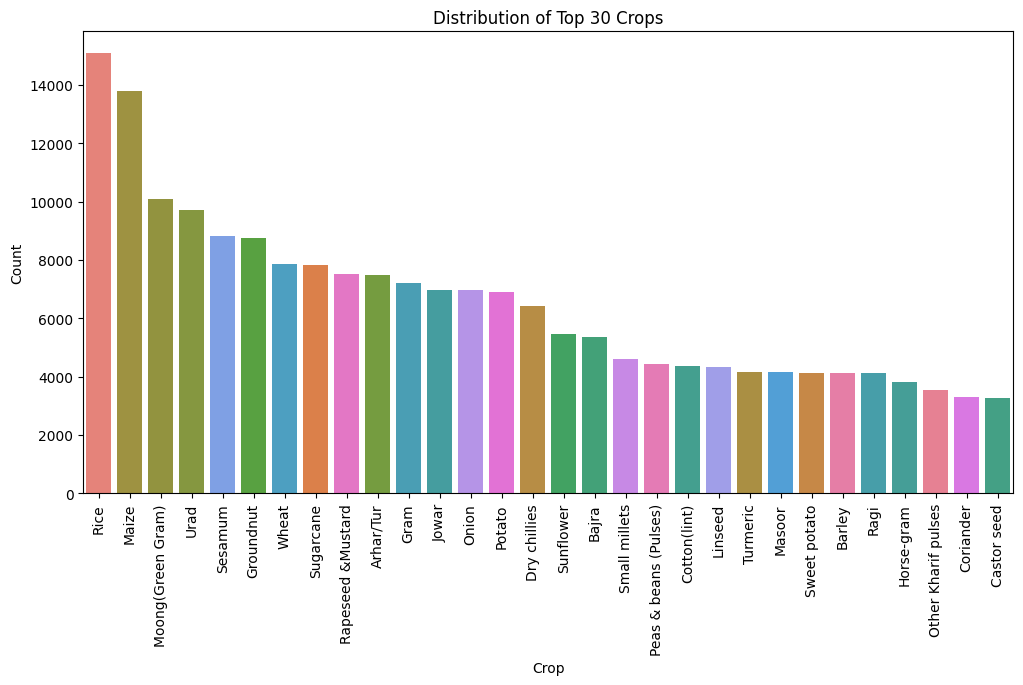

In [25]:
# Select the top 30 crops based on frequency
top_crops = data['Crop'].value_counts().head(30).index
 
data_top_30 = data[data['Crop'].isin(top_crops)]

# Plot the distribution of top 30 crops
plt.figure(figsize=(12, 6))
sns.countplot(x='Crop', data=data_top_30, order=top_crops, hue='Crop', legend=False)
plt.xlabel('Crop')
plt.ylabel('Count')
plt.title('Distribution of Top 30 Crops')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

###  Box Plots

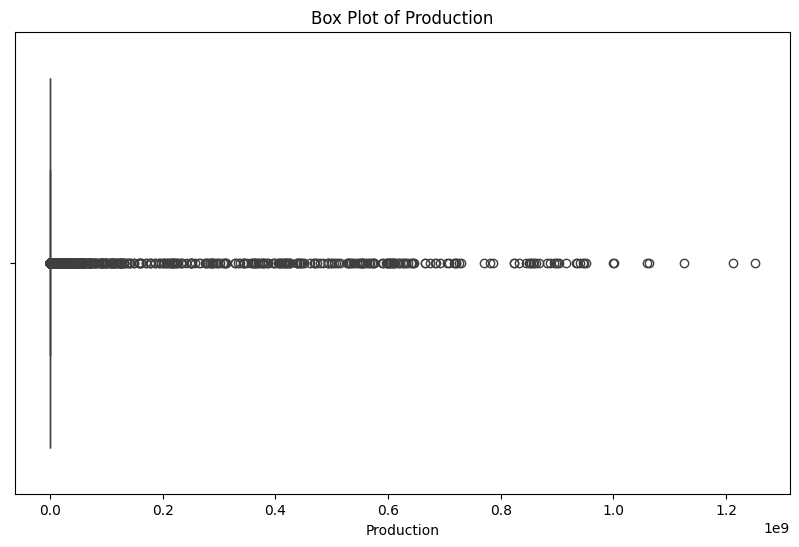

In [26]:
# Box Plot for Production
plt.figure(figsize=(10, 6))
sns.boxplot(x='Production', data=data)
plt.title('Box Plot of Production')
plt.xlabel('Production')
plt.show()

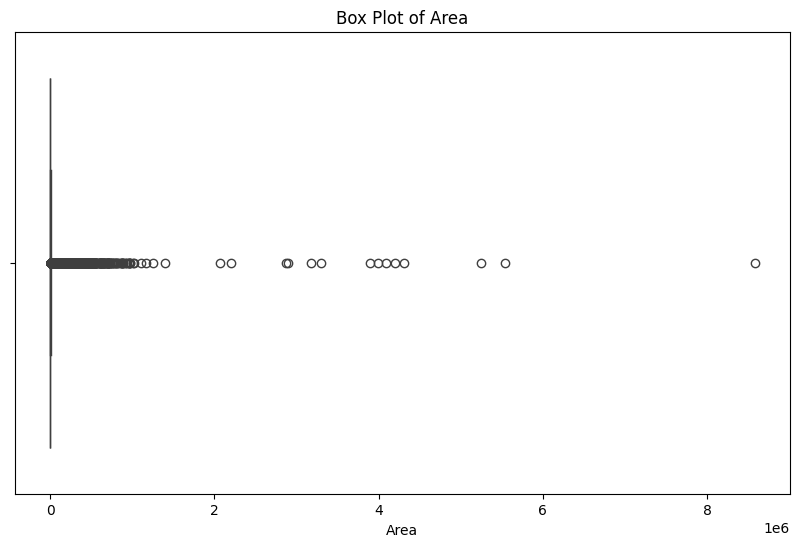

In [27]:
# Box Plot for Area
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', data=data)
plt.title('Box Plot of Area')
plt.xlabel('Area')
plt.show()

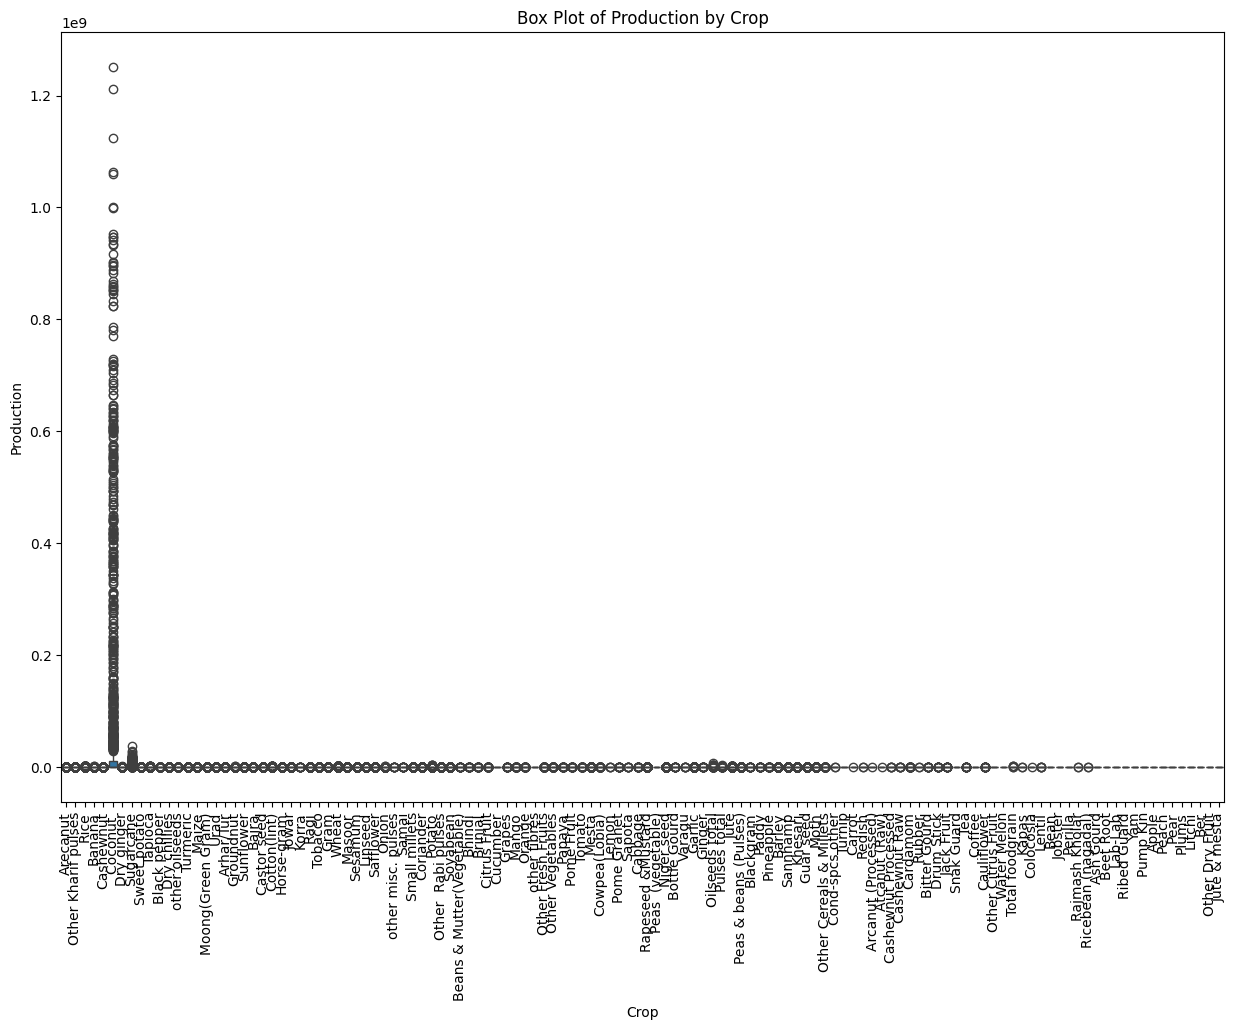

In [28]:
# Visualizing the distribution of Production for each Crop.
plt.figure(figsize=(15, 10))
sns.boxplot(x='Crop', y='Production', data=data)
plt.title('Box Plot of Production by Crop')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

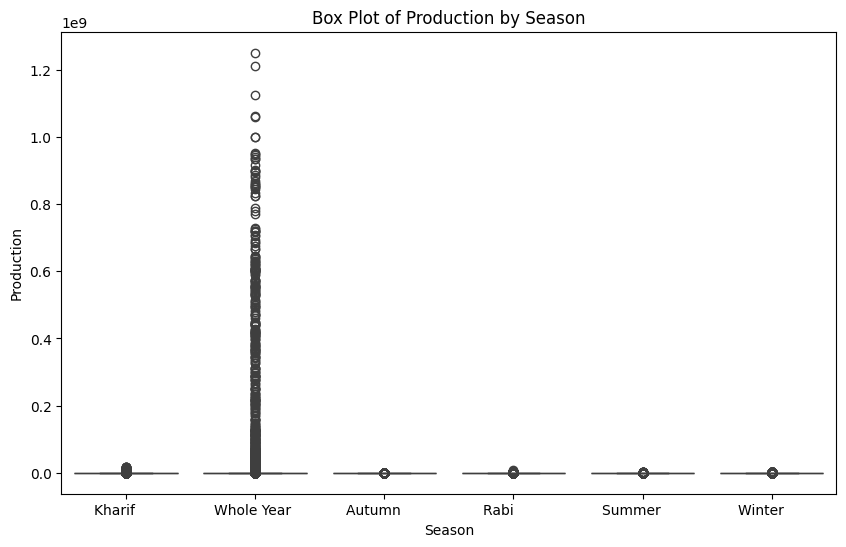

In [28]:
# Box Plot for Season:
# Visualizing the distribution of Production for each Season.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Production', data=data)
plt.title('Box Plot of Production by Season')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()

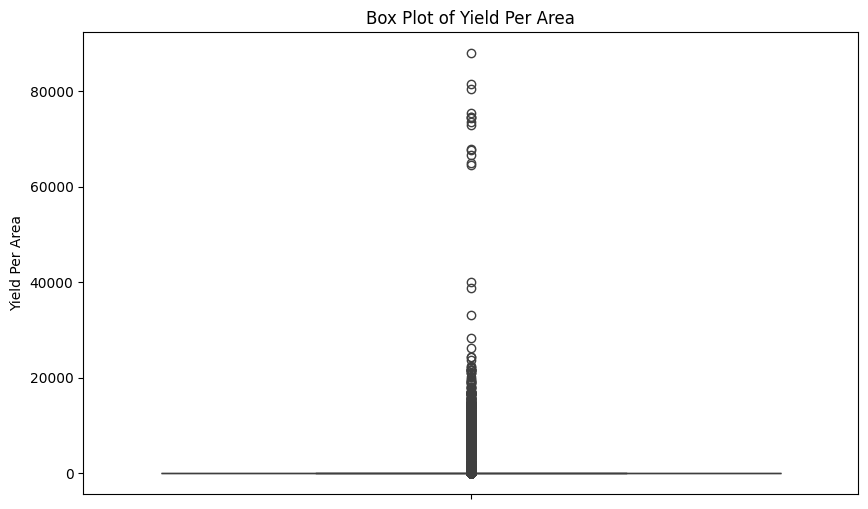

In [29]:
# Box Plot for Yield_Per_Area:
# Visualize the distribution of Yield_Per_Area.
plt.figure(figsize=(10, 6))
sns.boxplot(y='Yield_Per_Area', data=data)
plt.title('Box Plot of Yield Per Area')
plt.ylabel('Yield Per Area')
plt.show()

In [ ]:
# Box Plots for Yield_Per_Area by Crop and Season

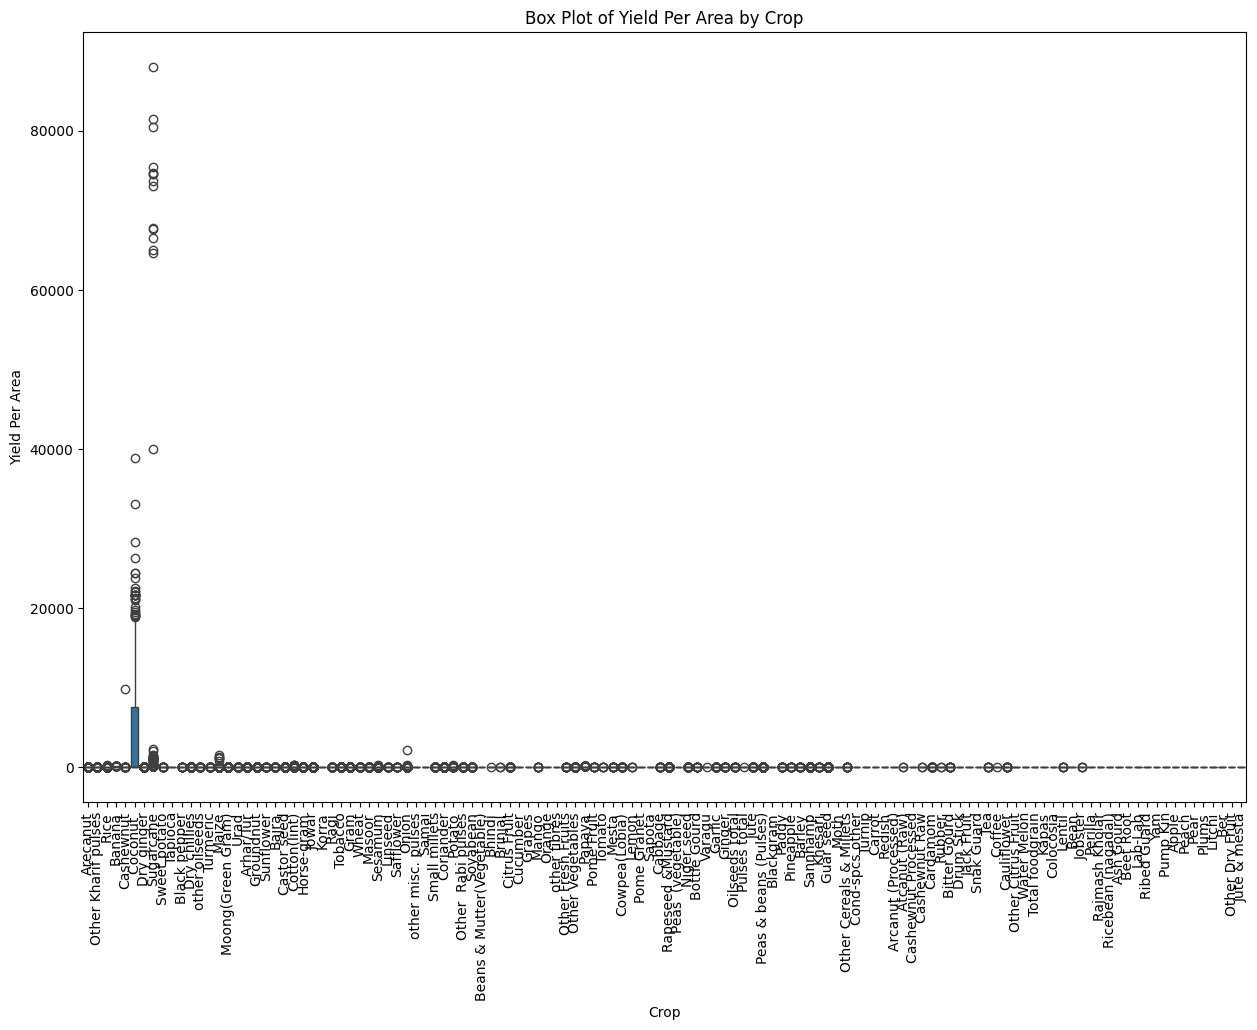

In [30]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Crop', y='Yield_Per_Area', data=data)
plt.title('Box Plot of Yield Per Area by Crop')
plt.xlabel('Crop')
plt.ylabel('Yield Per Area')
plt.xticks(rotation=90)
plt.show()

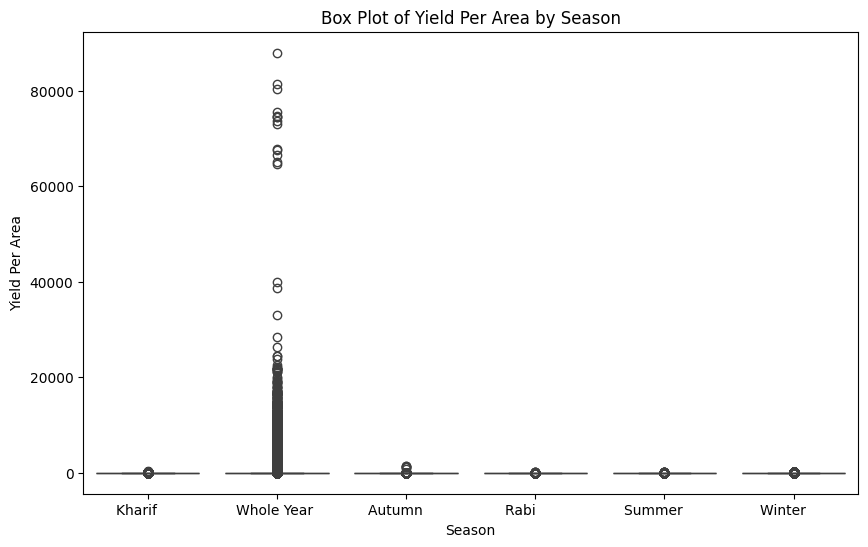

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Yield_Per_Area', data=data)
plt.title('Box Plot of Yield Per Area by Season')
plt.xlabel('Season')
plt.ylabel('Yield Per Area')
plt.show()

In [ ]:
## Scatter plots

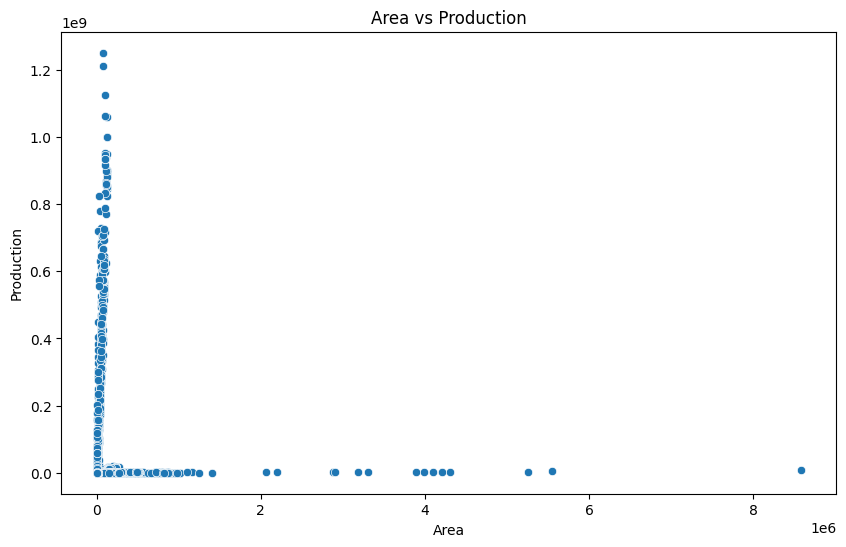

In [32]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', data=data)
plt.title('Area vs Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()

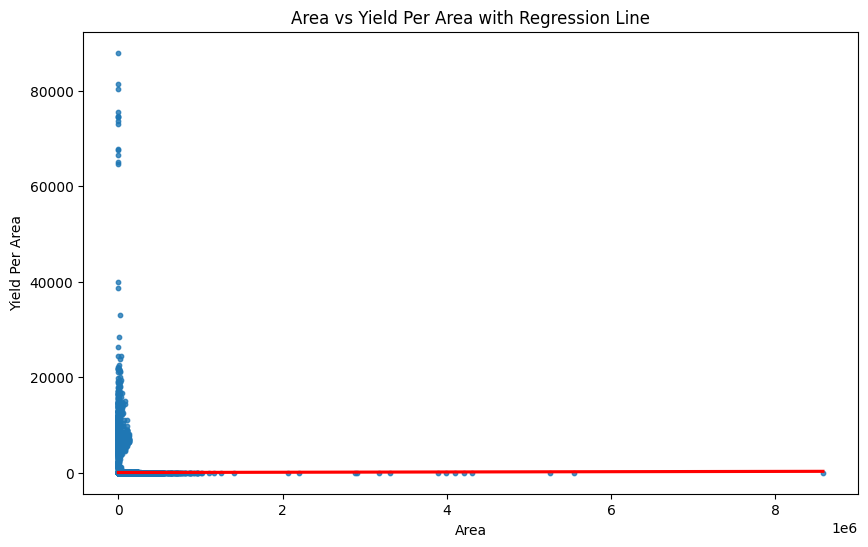

In [33]:
#Area vs Yield_Per_Area:
plt.figure(figsize=(10, 6))
sns.regplot(x='Area', y='Yield_Per_Area', data=data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Area vs Yield Per Area with Regression Line')
plt.xlabel('Area')
plt.ylabel('Yield Per Area')
plt.show()

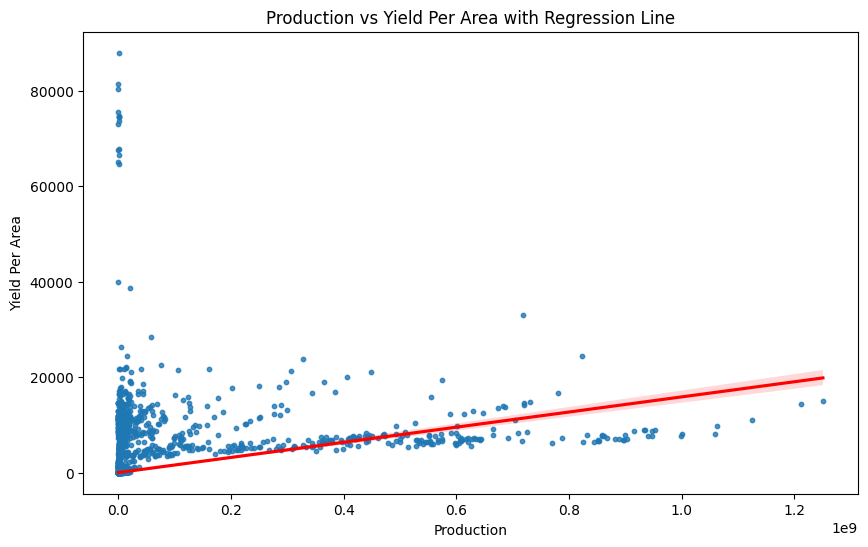

In [34]:
##Production vs Yield_Per_Area:
plt.figure(figsize=(10, 6))
sns.regplot(x='Production', y='Yield_Per_Area', data=data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Production vs Yield Per Area with Regression Line')
plt.xlabel('Production')
plt.ylabel('Yield Per Area')
plt.show()

In [ ]:
# Correlation Matrix:

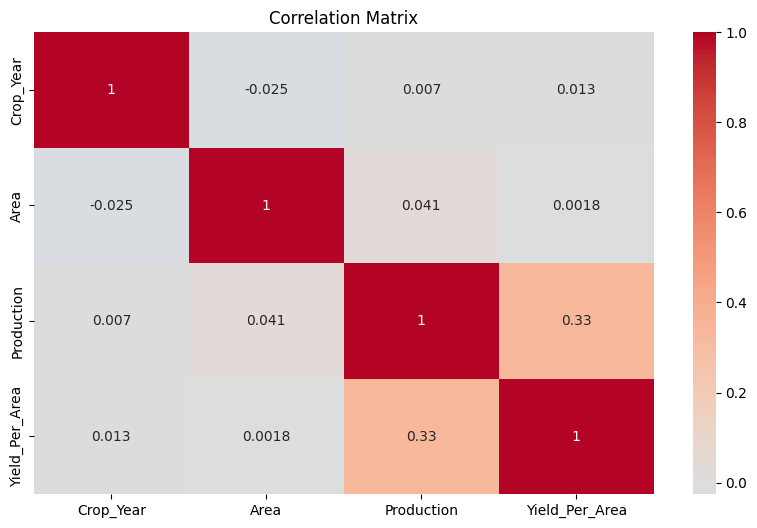

In [35]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Z-score Calculation:

In [36]:
from scipy.stats import zscore

# Calculate Z-scores for Area and Production
data['Production_zscore'] = zscore(data['Production'])
data['Area_zscore'] = zscore(data['Area'])

# Identify outliers
data['Outlier'] = ((data['Production_zscore'].abs() > 3) | (data['Area_zscore'].abs() > 3)).astype(int)

In [37]:
# Count the number of outliers and non-outliers
outlier_count = data['Outlier'].value_counts()

# Create labels for the pie chart
labels = ['Non-Outliers', 'Outliers']
sizes = [outlier_count[0], outlier_count[1]]
colors = ['lightblue', 'lightcoral']

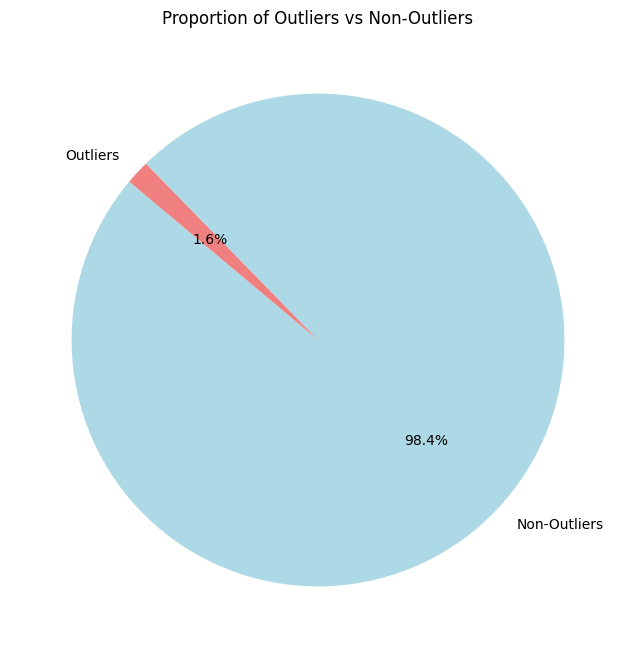

In [38]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Outliers vs Non-Outliers')
plt.show()

In [39]:
# Displaying the rows with high Z-scores (outliers)
outliers = data[(data['Production_zscore'].abs() > 3) | (data['Area_zscore'].abs() > 3)]
print(outliers)

                         State_Name District_Name  Crop_Year       Season  \
5       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
14      Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
23      Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
32      Andaman and Nicobar Islands      NICOBARS       2003  Whole Year    
41      Andaman and Nicobar Islands      NICOBARS       2004  Whole Year    
...                             ...           ...        ...          ...   
245921                  West Bengal       PURULIA       2009  Winter        
245985                  West Bengal       PURULIA       2011  Winter        
246017                  West Bengal       PURULIA       2012  Winter        
246052                  West Bengal       PURULIA       2013  Winter        
246089                  West Bengal       PURULIA       2014  Winter        

            Crop       Area  Production  Yield_Per_Area  Production_zscore 

#### Model Building - ML (Machine Learning)

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [41]:
# Encode categorical variables
label_encoders = {}
for column in ['State_Name', 'District_Name', 'Season', 'Crop']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [42]:
# Create the target variable and feature set
X = data.drop(['Production'], axis=1)
y = data['Production']

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42),
    'K-Neighbors Regressor': KNeighborsRegressor()
}

In [46]:
# Train models
trained_models = {}
for name, model in models.items():
    if name == 'Bagging Regressor':
        model.set_params(estimator=DecisionTreeRegressor())  # Update base_estimator to estimator
        model.set_params(base_estimator=None)  # Remove base_estimator
    model.fit(X_train, y_train)
    trained_models[name] = model

In [47]:
# Evaluate models
best_model = None
best_r2_score = -1  # Initialize with a negative value

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}:')
    print(f'  R-squared: {r2}')
    print('-------------------------------------')

    # Check if the current model has a higher R-squared score than the best model found so far
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model = name

print(f"The model with the highest R-squared score is {best_model} with an R-squared score of {best_r2_score}")


Linear Regression:
  R-squared: 1.0
-------------------------------------
Decision Tree Regressor:
  R-squared: 0.9997192352368985
-------------------------------------
Random Forest Regressor:
  R-squared: 0.9995583545181337
-------------------------------------
Gradient Boosting Regressor:
  R-squared: 0.9998736323506069
-------------------------------------
Bagging Regressor:
  R-squared: 0.9997275506192514
-------------------------------------
K-Neighbors Regressor:
  R-squared: 0.9967575677354238
-------------------------------------
The model with the highest R-squared score is Linear Regression with an R-squared score of 1.0


In [48]:
import pickle

# Assuming the best-performing model is stored in the variable `best_model`
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [49]:
# Save the label encoders
with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

In [51]:
import os

# Create the 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Save the scaler
with open('model/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)